<a href="https://colab.research.google.com/github/rohitmurari/automatic-dollop/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Hotel Booking Analysis**

Our goal with the project on hotel booking analysis is to analyse the data of hotel bookings and suggest insights based on that analysis. Also suggest ways to improve business based on those insights.

In [ ]:
#uploading file
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
## reading file into dataframe
import pandas as pd
df = pd.read_csv('Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#summary of the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**-->** **Data Cleaning**

In [ ]:
#checking for null values and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data shows there are NAN values and it needs to be cleaned.

We need to drop column Company because very low count of not null values are present for Company column.

In [ ]:
df.drop("company",axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


Data needs to be cleaned by removing rows where country is NAN because count for those NAN values is very less as compared to data size.

There are very less number of rows left where children is null. So we can remove those rows as well where children value is null.

In [ ]:
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['children'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

"agent" is the only column left with null values. Let's see what values are there in agent.

In [ ]:
#checking not nul vaues of agent
df[df["agent"].notna()]["agent"]

,agent
3,304.0
4,240.0
5,240.0
7,303.0
8,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


Values of agent are not clear, they seem agent id but are float. It is better  to remove column agent in this case

In [ ]:
#removing column agent
df.drop("agent",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

**--> Data Analysis**

Now that the data has been cleaned and there is no null value present, let's find out the cancellation percentages hotel wise

In [ ]:
total_bookings = df.groupby('hotel')['is_canceled'].count().reset_index(name='Total Bookings')

# Cancelled bookings per hotel
cancelled_bookings = df[df['is_canceled'] == 1].groupby('hotel')['is_canceled'].count().reset_index(name='Cancelled Bookings')

# Merge the two DataFrames to calculate the percentage
summary = pd.merge(total_bookings, cancelled_bookings, on='hotel', how='left')

# Calculate cancellation percentage
summary['Cancellation Percentage'] = (summary['Cancelled Bookings'] / summary['Total Bookings']) * 100

# Display the final DataFrame
print(summary)

          hotel  Total Bookings  Cancelled Bookings  Cancellation Percentage
0    City Hotel           79302               33076                41.708910
1  Resort Hotel           39596               11077                27.975048


As we can see cancellations are very high for City hotels as compared to Resort hotels. Let's visualize it

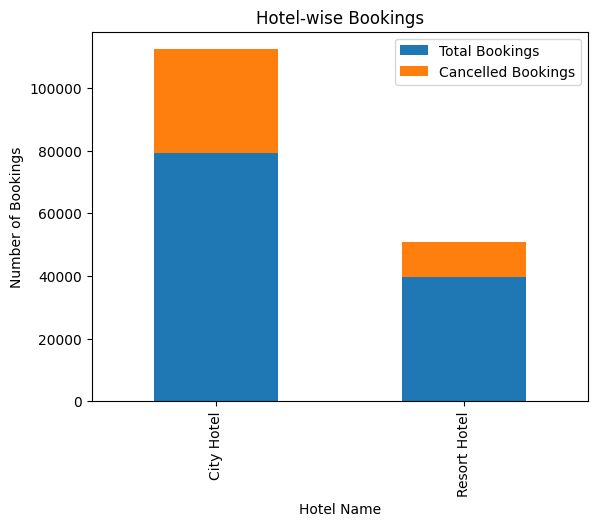

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
summary.drop("Cancellation Percentage",axis=1).plot(kind='bar', x='hotel', stacked=True, title='Hotel-wise Bookings')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')
plt.show()

Let's visualize it in percentage terms as well

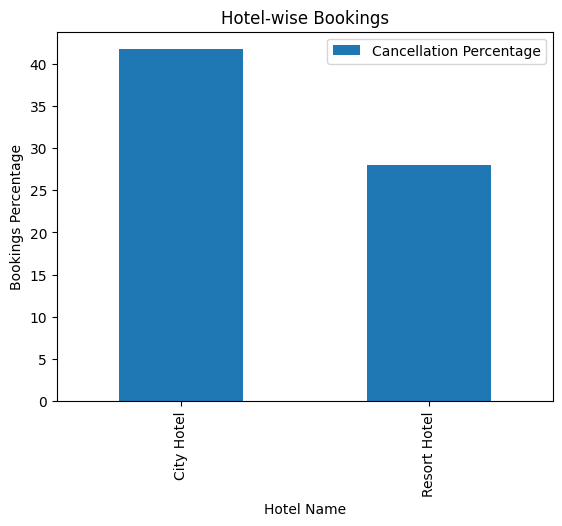

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
summary.drop(["Total Bookings","Cancelled Bookings"],axis=1).plot(kind='bar', x='hotel', stacked=True, title='Hotel-wise Bookings')
plt.xlabel('Hotel Name')
plt.ylabel('Bookings Percentage')
plt.show()

Let's check if there is significantly higher booking in any specific month

In [ ]:
df.groupby('arrival_date_year')['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               September             5084
                   October               4919
                   August                3873
                   December              2900
                   July                  2763
                   November              2320
2016               October               6176
                   May                   5466
                   April                 5404
                   September             5383
                   June                  5280
                   August                5054
                   March                 4788
                   July                  4552
                   November              4432
                   February              3857
                   December              3828
                   January               2215
2017               May                   6313
                   June                  5647
                   April                 5641
                   July                  5313
                   March                 4951
                   August                4925
                   February              4155
                   January               3659
Name: count, dtype: int64

From the output it is clear that we don't have data for all the months for all 3 years. So month wise or year wise booking data can not be compared.

Checking number of weekend nights and week nights bookings.

In [ ]:
print("stays in weekend nights",df["stays_in_weekend_nights"].sum())
print("stays in week nights",df["stays_in_week_nights"].sum())

stays in weekend nights 110444
stays in week nights 297500


Checking if guests are repeating bookings or not.

In [ ]:
df["is_repeated_guest"].value_counts()

,count
is_repeated_guest,
0,115092
1,3806


Data on repeated guests tell that guests are not repeating and most are new bookings.

Let's see which countries are giving most number of bookings.We will try to see 10 countries with highest number of bookings.

In [ ]:
df["country"].value_counts().head(10)

,count
country,
PRT,48586
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


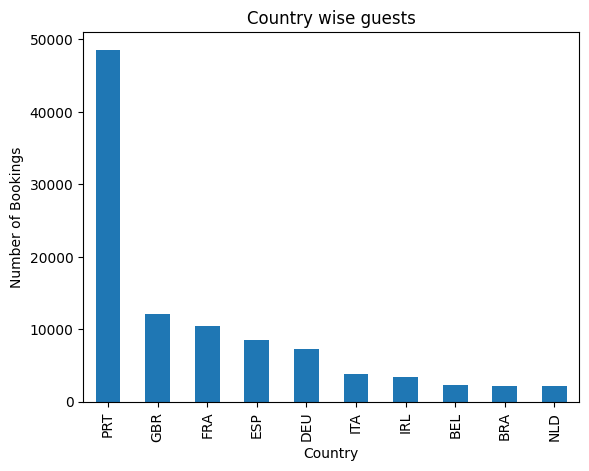

In [ ]:
import matplotlib.pyplot as plt

# Plot the data

df["country"].value_counts().head(10).plot(kind='bar', x='country', title='Country wise guests')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

Data suggests thaat most number of bookings are from Portugal.

Let's visualize distribution of bookings and cancellations over hotel type

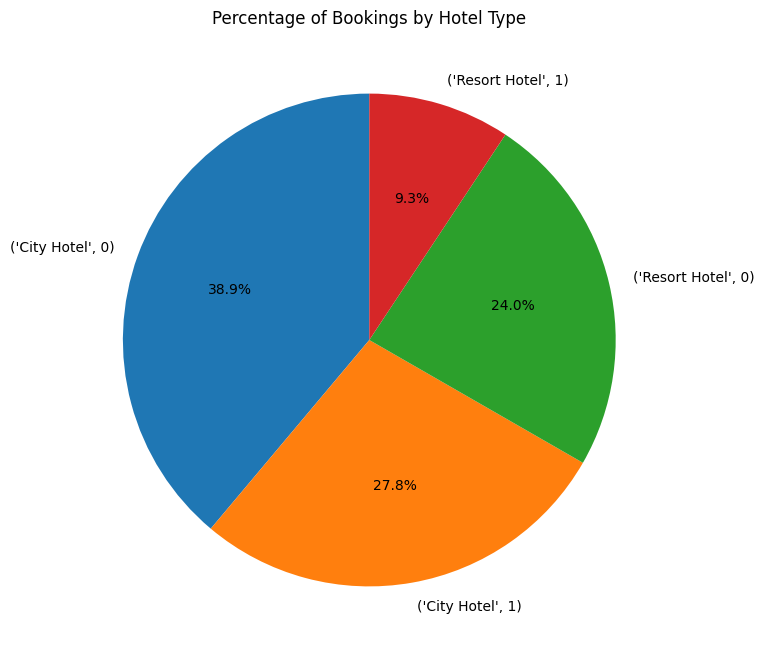

In [ ]:
import matplotlib.pyplot as plt

grouped_data = df.groupby('hotel')['is_canceled'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8,8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Bookings by Hotel Type')

# Display pie chart
plt.show()

Pie chart shows that significant number of bookings are for city hotels and significant portion of that is also cancelled.

Now we will visualize cancellation of booking over week numbers to identify if cancellations are significantly higher of any specific week.

<ipython-input-51-32822330abac>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_week_number', y='cancellation_count', data=cancellations_per_week, palette='Blues_d')


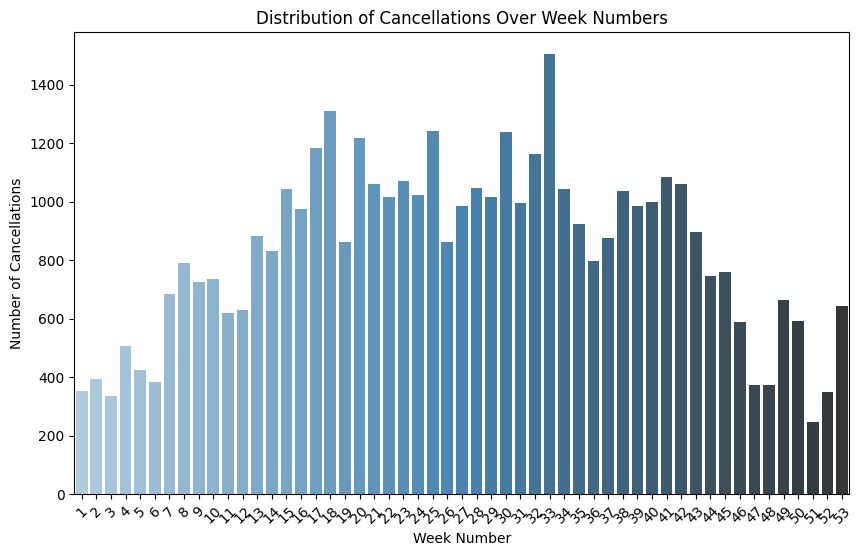

In [ ]:
import seaborn as sns

canceled_df = df[df['is_canceled'] == 1]

# Group by 'arrival_date_week_number' and count the number of cancellations
cancellations_per_week = canceled_df.groupby('arrival_date_week_number').size().reset_index(name='cancellation_count')

# Plotting the cancellations by week number using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_week_number', y='cancellation_count', data=cancellations_per_week, palette='Blues_d')

# Labeling
plt.title('Distribution of Cancellations Over Week Numbers')
plt.xlabel('Week Number')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)

# Display the plot
plt.show()




We don't have data available for all the months for all 3 years. Still it can be safely said that bookings are cancelled more towards middle of the year and very less cancelled towards start of the year.

## **Summary of Analysis**



1.   Cancellation are very high as percentage for city hotels.
2.   Guests are not repeating and are mostly new guests.
3.   Highest number of guests are from Potugal.
4.   Bookings are higher for city hotels as compared to resort hotels.



# **Conclusion**

We can draw following conclusions and steps can be taken to improve business



1.   City hotels should impose some penalty on cancellation or increase if already there to gain from high cancellations as well.
2.   Repeated customers are very less in bookings. Hotels should improve on service and take feedback from customers so that there are more repeated customers.
3.  Marketing should be done in countries other than Portugal to attract more customers from other countries.
4.  Resort hotels should take more efforts in marketing to attract more bookings.

